# Homework Eight - Mapping Economic Data
1. Find a way to represent the entire time series in a single file. You may either save a visualization for every data on separate pages in a pdf or you may create an MP4 or GIF file. Make sure that for every frame, the correct date is indicated. See how to accomplish this here. Differentiate your answer from the template provided in at least 3 ways. Identify how your output is differentiated.

2. Select a different time series data (e.g., incomes, etc...) set at the county level that has at least 20 observations. Create a map of the latest obervation of the data. Like with the covid data in (1), create a file that holds a visualization for every observation.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

In [2]:
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

In [3]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    map_data = gpd.read_file(filename = filename,
                                  index_col = index_col)
    map_data.rename(columns = {"State":"state"},
                    inplace = True)
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

In [7]:
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)

In [8]:
map_data["geometry"]

fips_code
21007    POLYGON ((-89.18137 37.04630, -89.17938 37.053...
21017    POLYGON ((-84.44266 38.28324, -84.44114 38.283...
21031    POLYGON ((-86.94486 37.07341, -86.94346 37.074...
21065    POLYGON ((-84.12662 37.64540, -84.12483 37.646...
21069    POLYGON ((-83.98428 38.44549, -83.98246 38.450...
                               ...                        
31073    POLYGON ((-100.09510 40.43866, -100.08937 40.4...
39075    POLYGON ((-82.22066 40.66758, -82.19327 40.667...
48171    POLYGON ((-99.30400 30.49983, -99.28234 30.499...
55079    POLYGON ((-88.06959 42.86726, -88.06959 42.872...
26139    POLYGON ((-86.26432 43.11830, -86.25103 43.118...
Name: geometry, Length: 3142, dtype: geometry

In [9]:
u_data = pd.read_csv(
    "countyUnemploymentData.csv", 
    encoding = "latin1", 
    parse_dates = True, 
    index_col="date")
u_data

C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\1102976848.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv(


,state_fips,county_fips,Location,Labor Force,Employed,Unemployed,Unemployment Rate,fips_code
date,,,,,,,,
2019-08-01,1,1,Autauga County AL,"26,079","25,368",711,2.7,1001
2019-08-01,1,3,Baldwin County AL,"97,939","95,367","2,572",2.6,1003
2019-08-01,1,5,Barbour County AL,"8,652","8,322",330,3.8,1005
2019-08-01,1,7,Bibb County AL,"8,670","8,403",267,3.1,1007
2019-08-01,1,9,Blount County AL,"25,309","24,641",668,2.6,1009
...,...,...,...,...,...,...,...,...
2021-06-01,72,145,Vega Baja Municipio PR,"12,993","11,580","1,413",10.9,72145
2021-06-01,72,147,Vieques Municipio PR,"2,610","2,288",322,12.3,72147
2021-06-01,72,149,Villalba Municipio PR,"6,940","6,152",788,11.4,72149


In [10]:
u_data.reset_index(inplace = True)
# index = u_data.dropna(subset = "fips_code", axis = 0).index
index = u_data["fips_code"].dropna(axis = 0).index
u_data = u_data.loc[index]
u_data

,date,state_fips,county_fips,Location,Labor Force,Employed,Unemployed,Unemployment Rate,fips_code
0,2019-08-01,1,1,Autauga County AL,"26,079","25,368",711,2.7,1001
1,2019-08-01,1,3,Baldwin County AL,"97,939","95,367","2,572",2.6,1003
2,2019-08-01,1,5,Barbour County AL,"8,652","8,322",330,3.8,1005
3,2019-08-01,1,7,Bibb County AL,"8,670","8,403",267,3.1,1007
4,2019-08-01,1,9,Blount County AL,"25,309","24,641",668,2.6,1009
...,...,...,...,...,...,...,...,...,...
74032,2021-06-01,72,145,Vega Baja Municipio PR,"12,993","11,580","1,413",10.9,72145
74033,2021-06-01,72,147,Vieques Municipio PR,"2,610","2,288",322,12.3,72147
74034,2021-06-01,72,149,Villalba Municipio PR,"6,940","6,152",788,11.4,72149
74035,2021-06-01,72,151,Yabucoa Municipio PR,"8,352","7,480",872,10.4,72151


In [11]:
u_data["fips_code"] = u_data["fips_code"].astype(int)
u_data.set_index(["fips_code", "date"], inplace = True)
u_data = u_data[list(u_data.keys())[-4:]]
u_data

,,Labor Force,Employed,Unemployed,Unemployment Rate
fips_code,date,,,,
1001,2019-08-01,"26,079","25,368",711,2.7
1003,2019-08-01,"97,939","95,367","2,572",2.6
1005,2019-08-01,"8,652","8,322",330,3.8
1007,2019-08-01,"8,670","8,403",267,3.1
1009,2019-08-01,"25,309","24,641",668,2.6
...,...,...,...,...,...
72145,2021-06-01,"12,993","11,580","1,413",10.9
72147,2021-06-01,"2,610","2,288",322,12.3
72149,2021-06-01,"6,940","6,152",788,11.4


In [17]:
import copy as copy

def create_merged_geo_dataframe(data, map_data, dates):
    matching_gpd = {}
    # gathered fips_code from index, remove duplicates because of panel df
    counties = data.index.get_level_values("fips_code").unique()
    # go through each column in the panda dataframe
    for key, val in data.items():
        # save a copyp of the map-data (df) for each key
        # keys will be labor force, unemployment rate, etc...
        matching_gpd[key] = copy.copy(map_data[map_data.index.isin(counties)])
        # add each date for the key from the panel with the date as the column name
        for date in dates:
            val_slice = val[val.index.get_level_values("date") == date]
            val_slice = val_slice.reset_index(drop = False).set_index("fips_code")
            matching_gpd[key][date] = val_slice[key]
    return matching_gpd
dates = u_data.index.get_level_values("date").unique()
u = create_merged_geo_dataframe(u_data, map_data, dates)
u

{'Labor Force':            STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
 fips_code                                                               
 21007           21      007  00516850  0500000US21007    Ballard   06   
 21017           21      017  00516855  0500000US21017    Bourbon   06   
 21031           21      031  00516862  0500000US21031     Butler   06   
 21065           21      065  00516879  0500000US21065     Estill   06   
 21069           21      069  00516881  0500000US21069    Fleming   06   
 ...            ...      ...       ...             ...        ...  ...   
 31073           31      073  00835858  0500000US31073     Gosper   06   
 39075           39      075  01074050  0500000US39075     Holmes   06   
 48171           48      171  01383871  0500000US48171  Gillespie   06   
 55079           55      079  01581100  0500000US55079  Milwaukee   06   
 26139           26      139  01623012  0500000US26139     Ottawa   06   
 
                 ALAN

In [18]:
u_data = u 
for key in u_data.keys():
    if u_data[key][dates[0]].dtypes == object:
        for date in dates:
            u_data[key][date] = pd.to_numeric(u_data[key][date], errors = "coerce")

In [19]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

In [20]:
u_data = u 
for key, val in u_data.items():
    df = val
    minx = df.bounds["minx"].min()
    miny = df.bounds["miny"].min()
    maxy = df.bounds["maxy"].max()
    maxx = -58
    
    bounded_data = select_data_within_bounds(df, minx, miny, maxx, maxy)
    u_data[key] = bounded_data

In [23]:
key = "Unemployment Rate"
df = u_data[key]
key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"
feb2020 =dates[6]
u_data[new_key] = u_data[key].copy()
for date in dates:
    u_data[new_key][date] = u_data[key][date].sub(
        u_data[key][feb2020])
u_data[new_key].tail()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
fips_code,,,,,,,,,,,,,,,,,,,,,
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,...,-0.1,-0.2,-0.3,-0.6,-0.4,-0.1,-0.3,-0.4,-0.3,-0.2
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,...,-0.1,-1.3,-1.2,-0.7,-0.2,-0.2,-0.9,-1.2,-0.7,0.5
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,...,1.9,1.3,1.3,1.2,1.8,1.8,1.7,1.1,1.1,1.5
55079,55,079,01581100,0500000US55079,Milwaukee,06,625440563,2455383635,945726.0,Wisconsin,...,3.4,2.4,1.8,1.3,1.6,1.9,2.0,2.1,1.6,2.4
26139,26,139,01623012,0500000US26139,Ottawa,06,1459502408,2765830983,291830.0,Michigan,...,2.3,1.8,2.1,2.8,2.5,1.9,2.0,1.4,2.0,2.0


## 1. 

2019-08-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


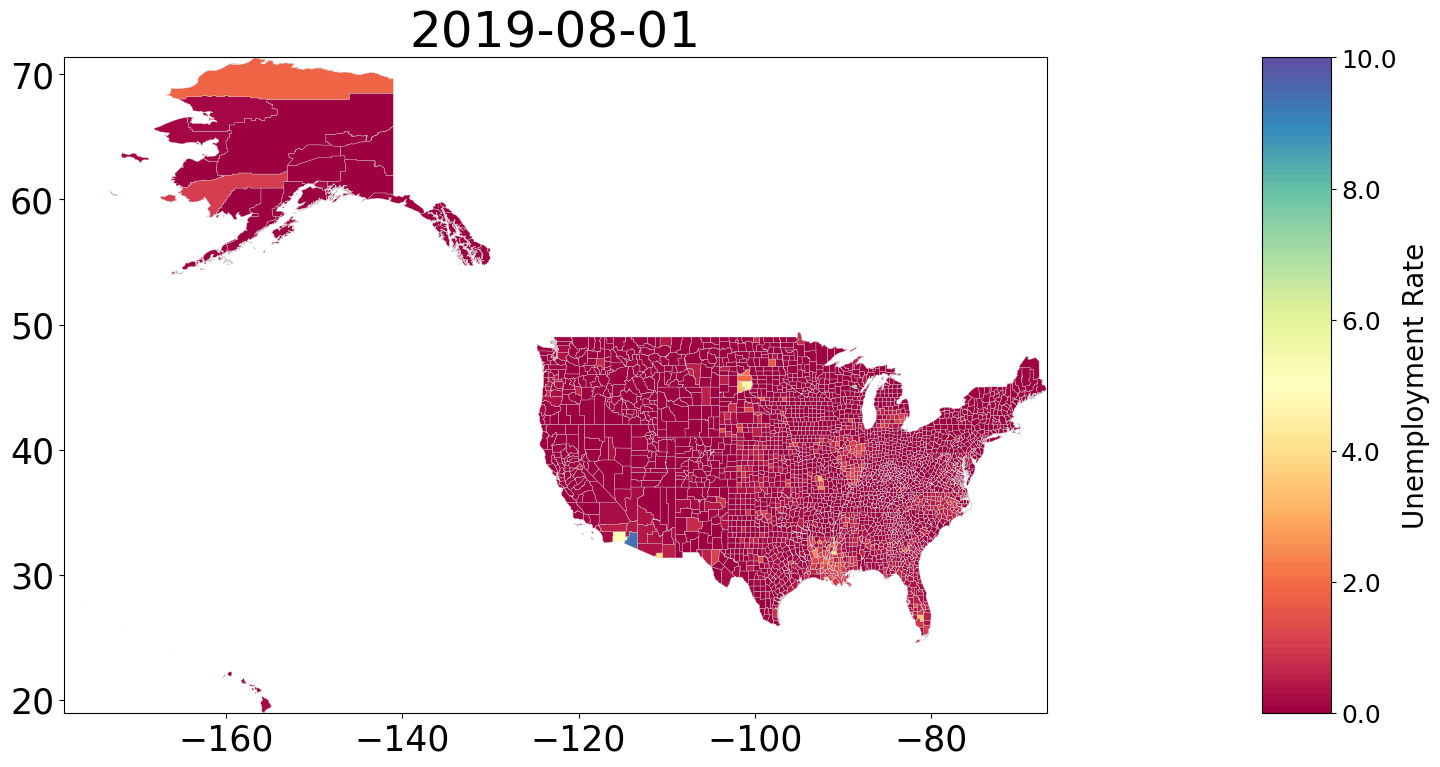

2019-09-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


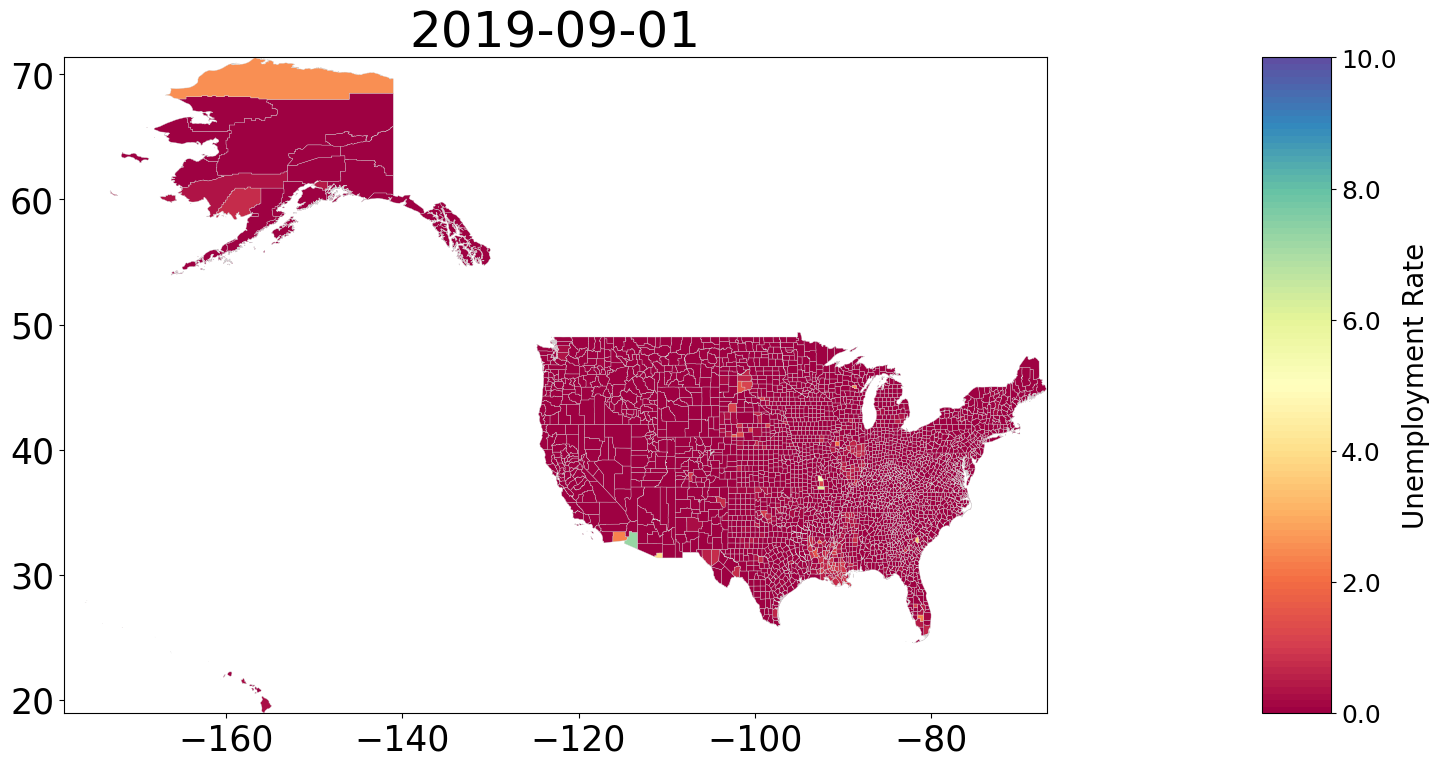

2019-10-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


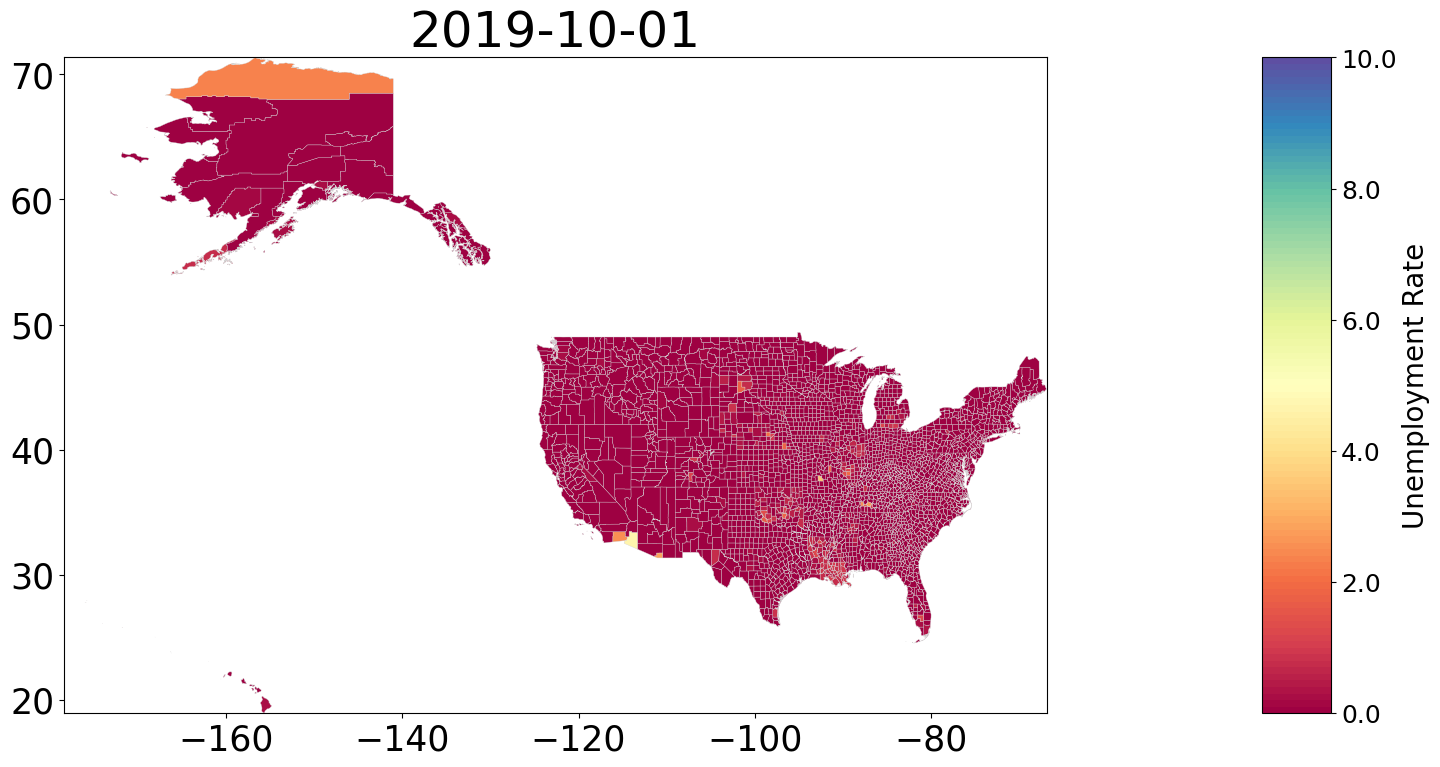

2019-11-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


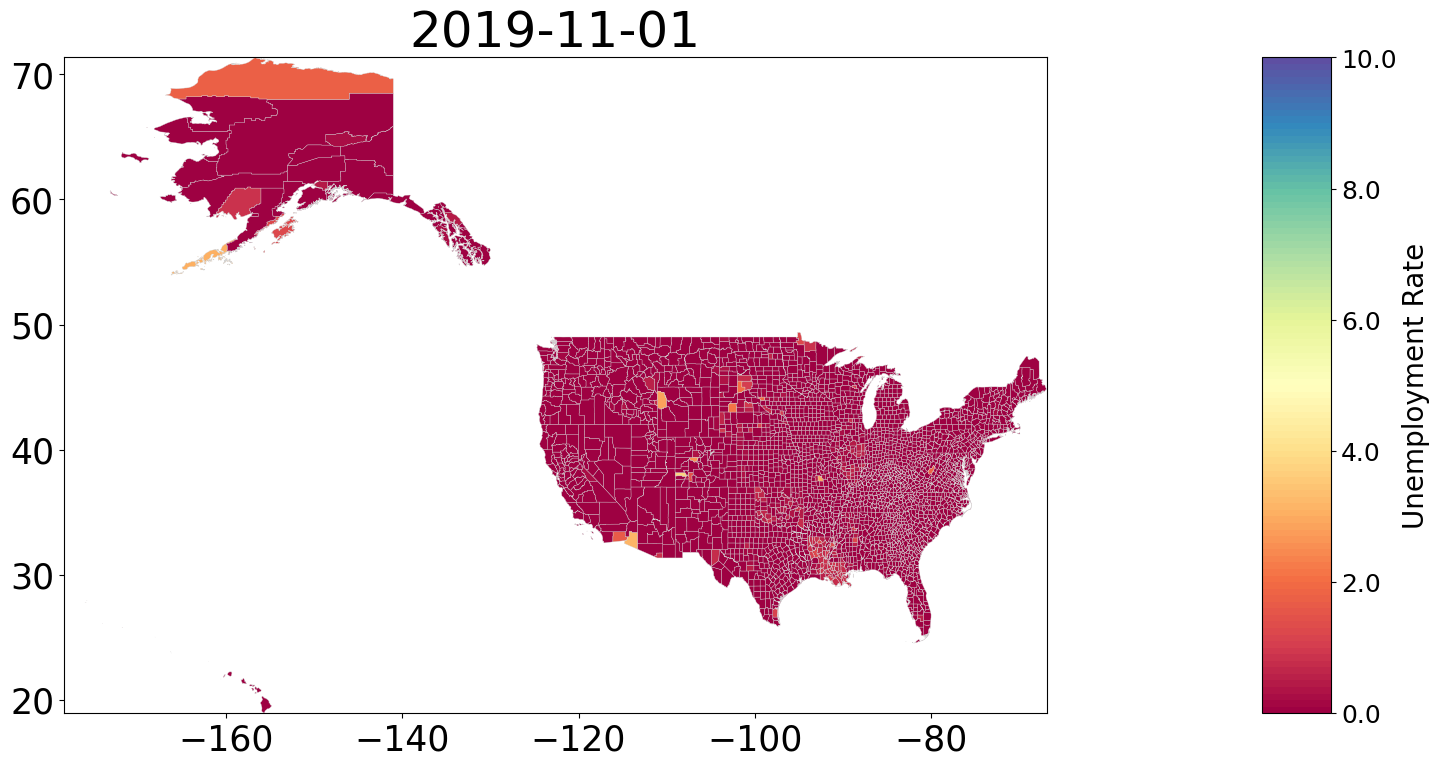

2019-12-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


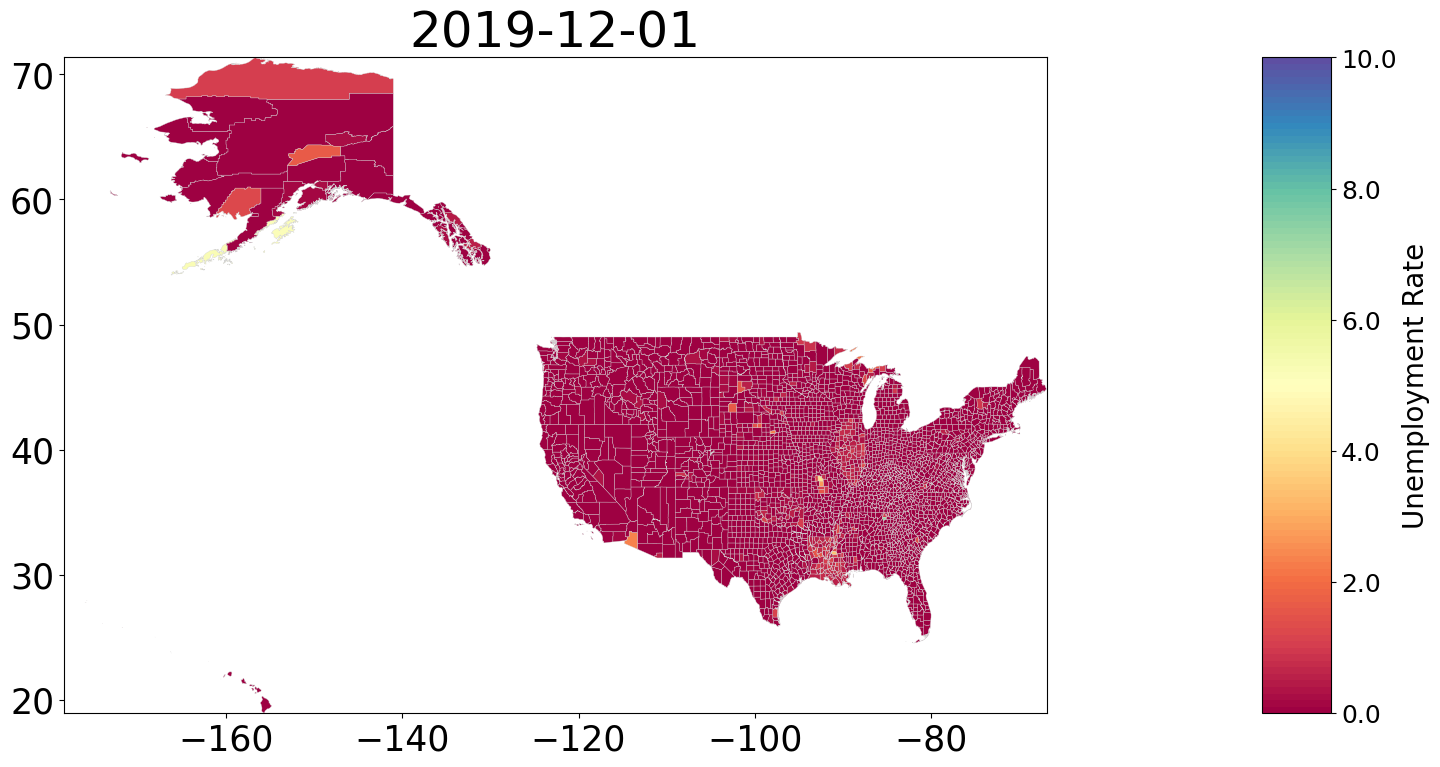

2020-01-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


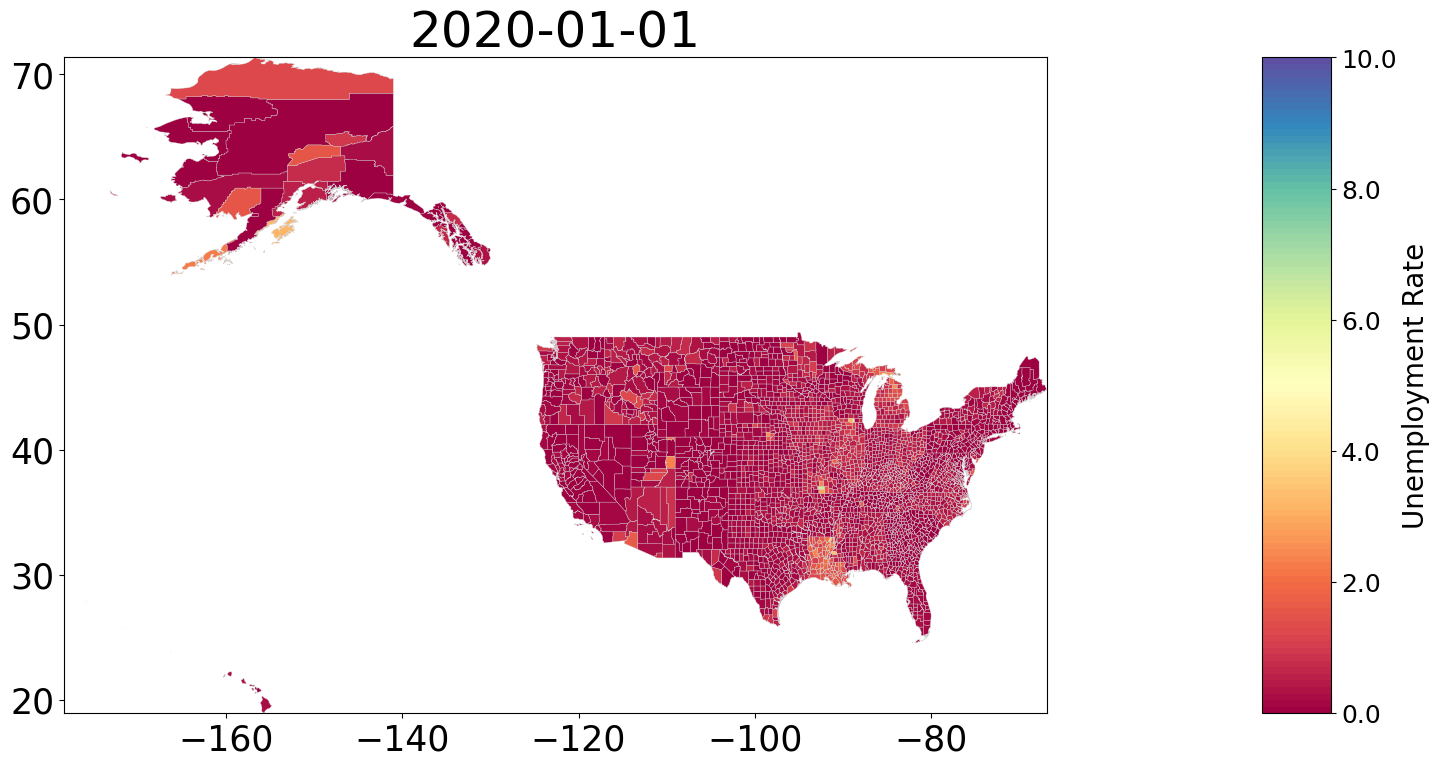

In [32]:
def plot_date_data(df, date, cmap = "Spectral", ndiv = 8, vmin = 0, vmax = 20,
                   pp = None, show_fig = True):
    print(date)
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    cmap = cm.get_cmap(cmap, ndiv)
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    ### add colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize=20)

    df.plot(ax=ax, cax=ax, column = date,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .25, edgecolor="lightgrey",norm=norm)
    ax.set_title(str(date)[:10])
    
    if show_fig:
        plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches = "tight")
    plt.close()

pp = PdfPages("County Unemployment Normalized - homework version.pdf")
for date in dates[:6]:
    plot_date_data(u_data[new_key], date = date, cmap = "Spectral", ndiv = 100,
                   vmin = 0, vmax = 10, pp = pp,
                   show_fig = True)
pp.close()

This is distinct from the template as it has a different color scheme and different range for the color bar, instead of -30 to 30 I used 0-10. These graphs also look at different dates, pre-covid era.   

## 2.
Using the "labor force" data  

In [35]:
key = "Labor Force"
df = u_data[key]
key = "Labor Force"
new_key = "Normalized " + key + " (Feb 2020)"
feb2020 =dates[6]
u_data[new_key] = u_data[key].copy()
for date in dates:
    u_data[new_key][date] = u_data[key][date].sub(
        u_data[key][feb2020])
u_data[new_key].tail()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
fips_code,,,,,,,,,,,,,,,,,,,,,
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55079,55,079,01581100,0500000US55079,Milwaukee,06,625440563,2455383635,945726.0,Wisconsin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26139,26,139,01623012,0500000US26139,Ottawa,06,1459502408,2765830983,291830.0,Michigan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
fips_code,,,,,,,,,,,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
u_data["Labor Force"]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
fips_code,,,,,,,,,,,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2019-08-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


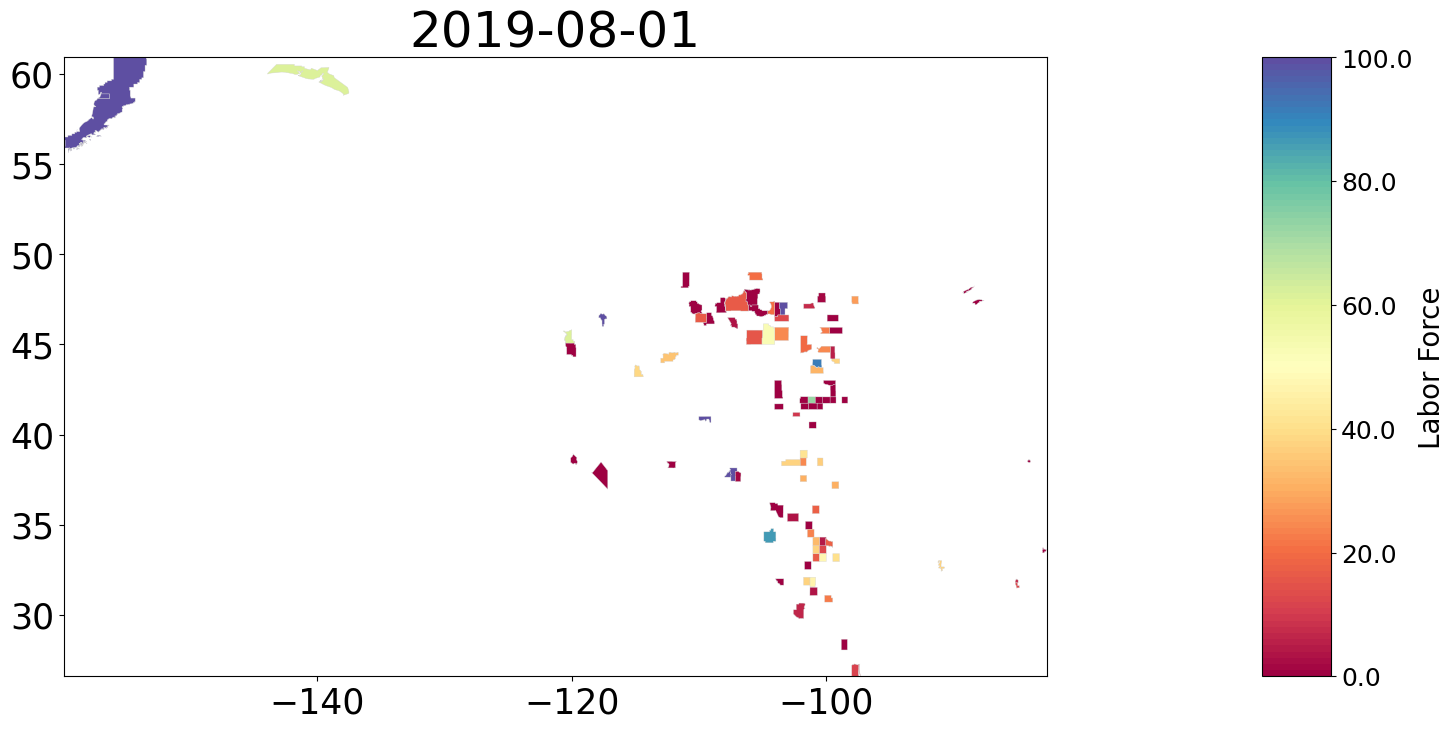

2019-09-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


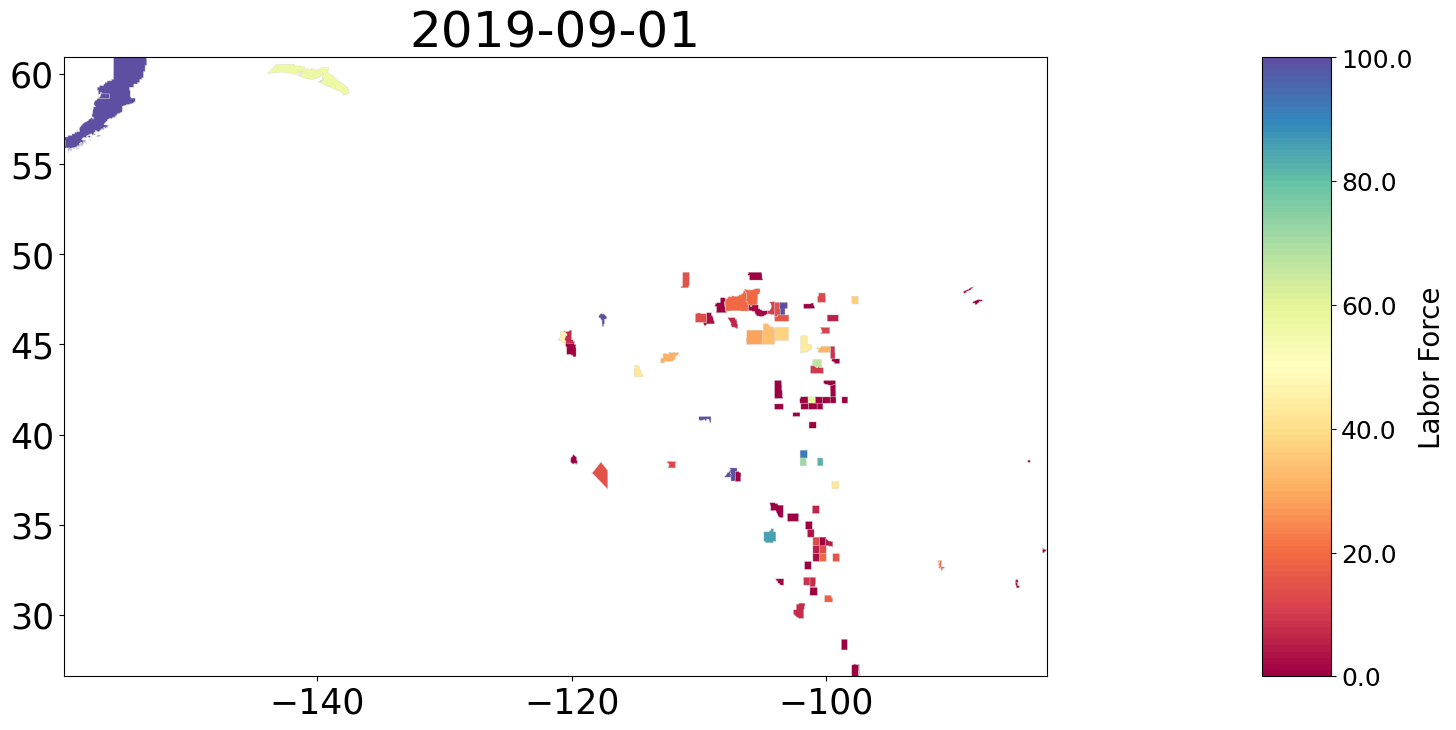

2019-10-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


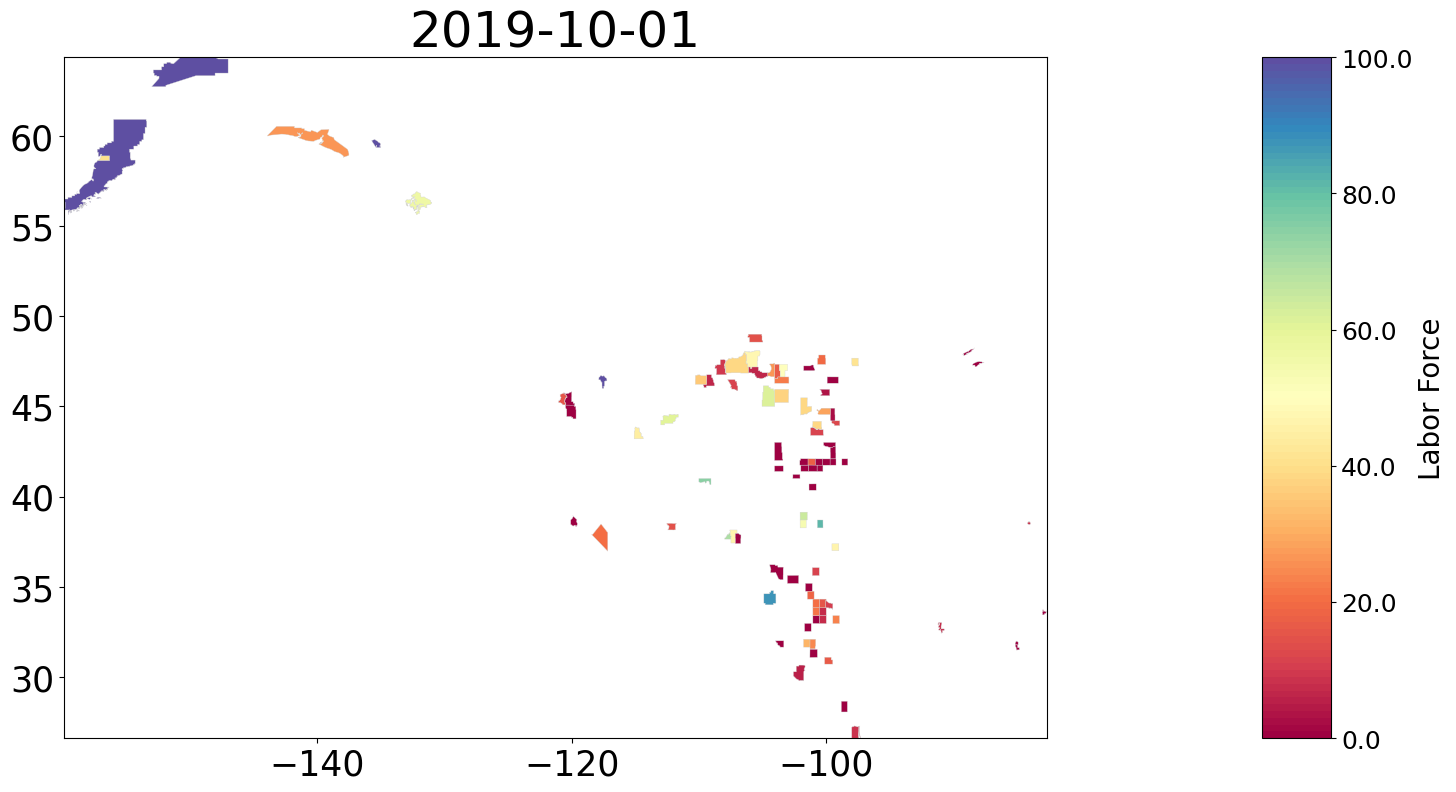

2019-11-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


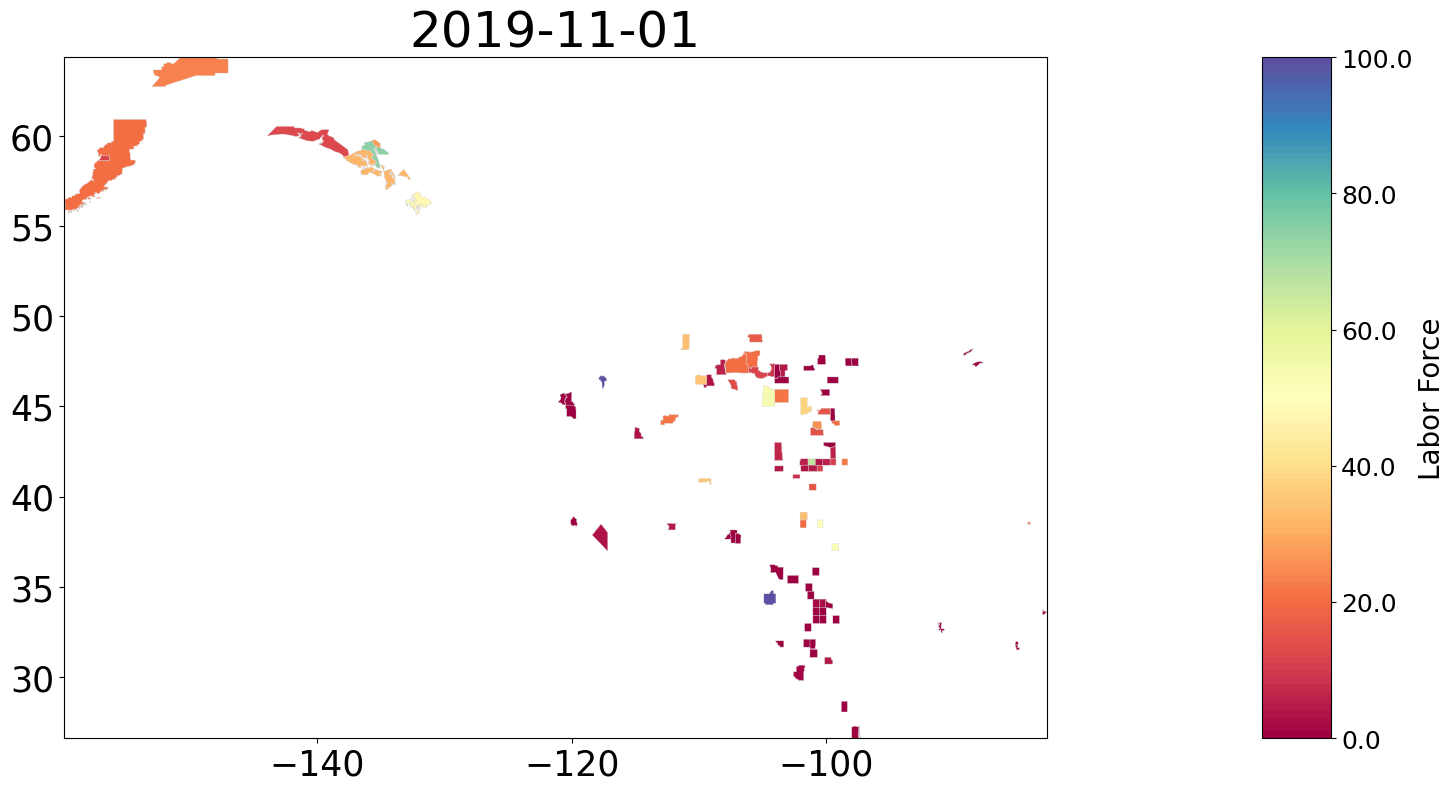

2019-12-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


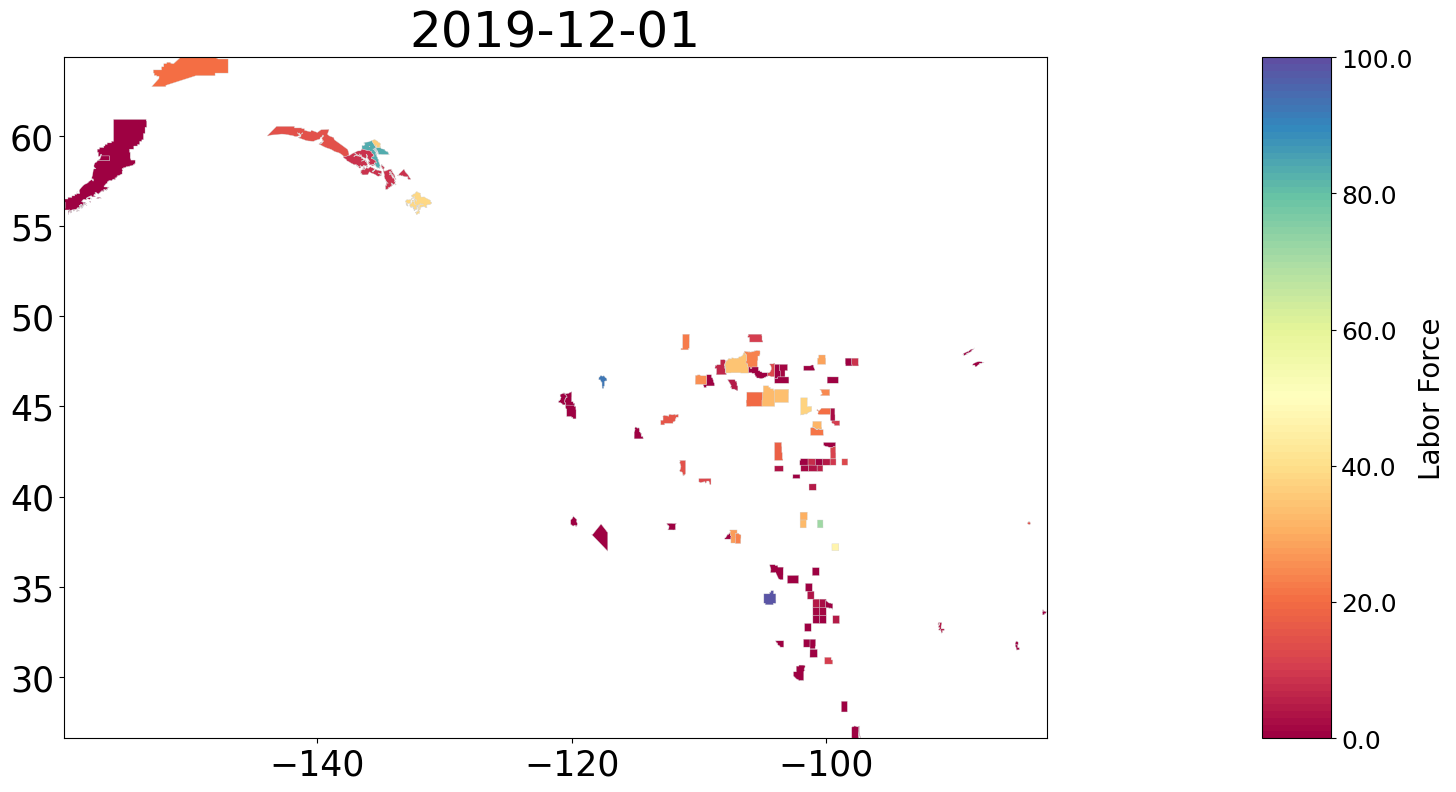

2020-01-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_7960\4094581870.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


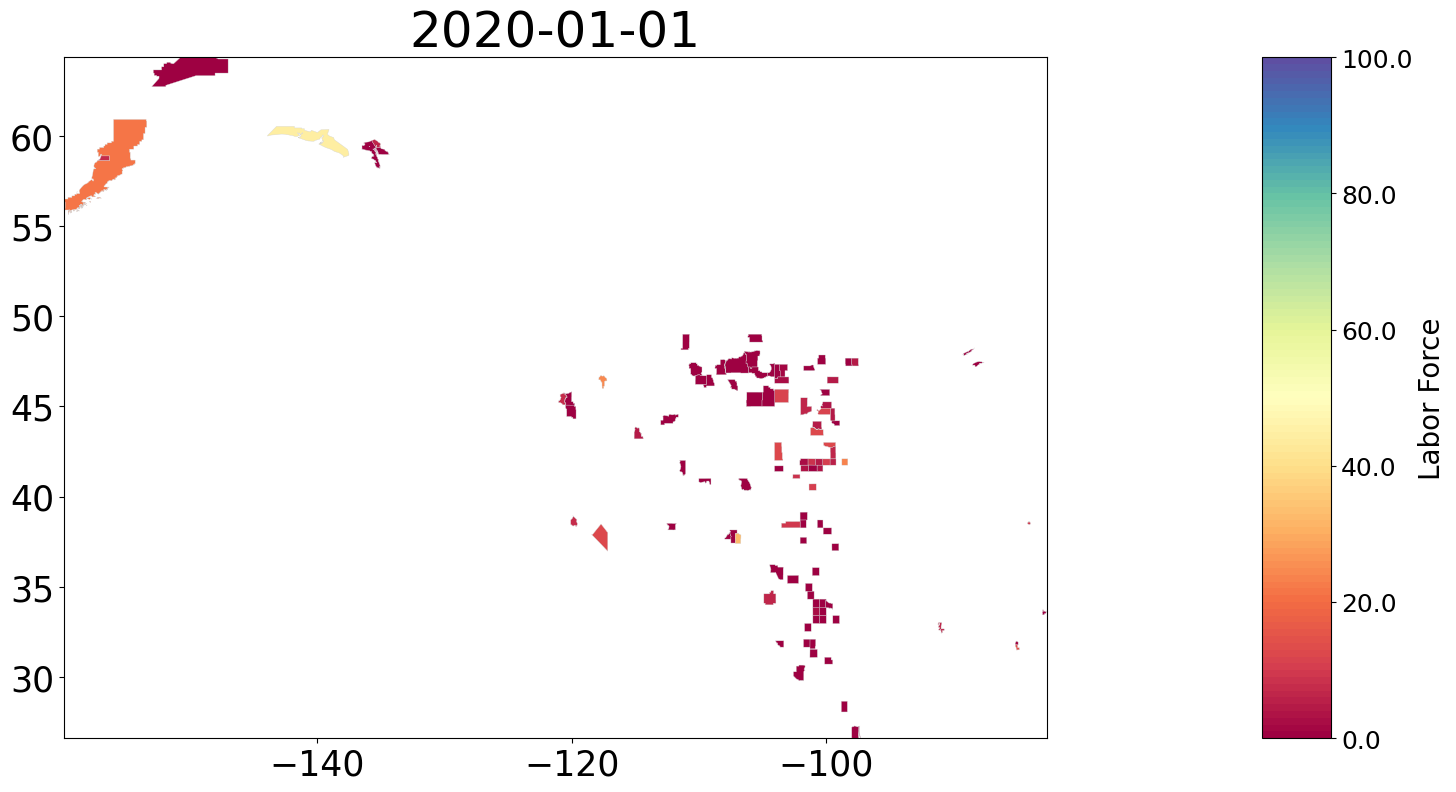

In [44]:
pp = PdfPages("County Labor Force - homework version.pdf")
for date in dates[:6]:
    plot_date_data(u_data[new_key], date = date, cmap = "Spectral", ndiv = 100,
                   vmin = 0, vmax = 100, pp = pp,
                   show_fig = True)
pp.close()